# Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import wrangle

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)

# Prepare and Acquire

In [2]:
df = pd.read_csv("clean_zillow.csv")

In [3]:
df.head()

,parcelid,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,...,in_los_angeles,in_orange_county,in_ventura,house_age,tax_rate,acres,level_of_log_error,square_feet_bins,lot_sqft_bins,acre_bins
0,10711855,261.0,1,2.0,3.0,8.0,2107.0,6037.0,0.0,2.0,...,1,0,0,49.0,81.487096,0.210239,Accurate,2k-2.5k,0-10k,0-15
1,10711877,261.0,1,2.0,4.0,8.0,1882.0,6037.0,0.0,2.0,...,1,0,0,49.0,81.241668,0.207415,Accurate,1.5l-2k,0-10k,0-15
2,10711888,261.0,1,2.0,4.0,8.0,1882.0,6037.0,0.0,2.0,...,1,0,0,49.0,81.358231,0.224977,Accurate,1.5l-2k,0-10k,0-15
3,10711910,261.0,1,2.0,3.0,8.0,1477.0,6037.0,0.0,2.0,...,1,0,0,61.0,69.891443,0.259068,Accurate,1k-1.5k,10k-20k,0-15
4,10711923,261.0,1,2.0,4.0,8.0,1918.0,6037.0,0.0,2.0,...,1,0,0,61.0,79.288338,0.258012,Accurate,1.5l-2k,10k-20k,0-15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59731 entries, 0 to 59730
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parcelid             59731 non-null  int64  
 1   land_type            59731 non-null  float64
 2   has_heating_system   59731 non-null  int64  
 3   bathrooms            59731 non-null  float64
 4   bedrooms             59731 non-null  float64
 5   quality              59731 non-null  float64
 6   square_feet          59731 non-null  float64
 7   fips                 59731 non-null  float64
 8   has_fireplace        59731 non-null  float64
 9   full_bathrooms       59731 non-null  float64
 10  latitude             59731 non-null  float64
 11  longitude            59731 non-null  float64
 12  lot_square_feet      59731 non-null  float64
 13  has_pool             59731 non-null  float64
 14  city                 59731 non-null  float64
 15  county               59731 non-null 

In [5]:
train, validate, test = wrangle.split_zillow(df)

In [6]:
train.head()

,parcelid,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,...,in_los_angeles,in_orange_county,in_ventura,house_age,tax_rate,acres,level_of_log_error,square_feet_bins,lot_sqft_bins,acre_bins
28964,12397645,261.0,1,2.0,3.0,6.0,1139.0,6037.0,0.0,2.0,...,1,0,0,70.0,77.088243,0.115886,Accurate,1k-1.5k,0-10k,0-15
42720,13899643,261.0,0,1.0,2.0,6.0,882.0,6059.0,0.0,1.0,...,0,1,0,65.0,99.593289,0.094582,Accurate,500-1k,0-10k,0-15
5104,10936804,261.0,1,1.0,2.0,4.0,943.0,6037.0,0.0,1.0,...,1,0,0,81.0,91.300853,0.163522,Accurate,500-1k,0-10k,0-15
37768,12877473,261.0,1,3.0,5.0,6.0,1449.0,6037.0,0.0,3.0,...,1,0,0,51.0,77.842486,0.141919,Over,1k-1.5k,0-10k,0-15
10735,11190920,261.0,1,2.0,4.0,8.0,1546.0,6037.0,0.0,2.0,...,1,0,0,29.0,51.992135,0.195294,Accurate,1.5l-2k,0-10k,0-15


In [7]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test)

In [8]:
X_train.head()

,parcelid,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,...,in_los_angeles,in_orange_county,in_ventura,house_age,tax_rate,acres,level_of_log_error,square_feet_bins,lot_sqft_bins,acre_bins
28964,12397645,261.0,1,2.0,3.0,6.0,1139.0,6037.0,0.0,2.0,...,1,0,0,70.0,77.088243,0.115886,Accurate,1k-1.5k,0-10k,0-15
42720,13899643,261.0,0,1.0,2.0,6.0,882.0,6059.0,0.0,1.0,...,0,1,0,65.0,99.593289,0.094582,Accurate,500-1k,0-10k,0-15
5104,10936804,261.0,1,1.0,2.0,4.0,943.0,6037.0,0.0,1.0,...,1,0,0,81.0,91.300853,0.163522,Accurate,500-1k,0-10k,0-15
37768,12877473,261.0,1,3.0,5.0,6.0,1449.0,6037.0,0.0,3.0,...,1,0,0,51.0,77.842486,0.141919,Over,1k-1.5k,0-10k,0-15
10735,11190920,261.0,1,2.0,4.0,8.0,1546.0,6037.0,0.0,2.0,...,1,0,0,29.0,51.992135,0.195294,Accurate,1.5l-2k,0-10k,0-15


In [9]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_my_data(train, validate, test)

In [10]:
train.head()

,parcelid,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,...,in_los_angeles,in_orange_county,in_ventura,house_age,tax_rate,acres,level_of_log_error,square_feet_bins,lot_sqft_bins,acre_bins
28964,12397645,261.0,1,2.0,3.0,6.0,1139.0,6037.0,0.0,2.0,...,1,0,0,70.0,77.088243,0.115886,Accurate,1k-1.5k,0-10k,0-15
42720,13899643,261.0,0,1.0,2.0,6.0,882.0,6059.0,0.0,1.0,...,0,1,0,65.0,99.593289,0.094582,Accurate,500-1k,0-10k,0-15
5104,10936804,261.0,1,1.0,2.0,4.0,943.0,6037.0,0.0,1.0,...,1,0,0,81.0,91.300853,0.163522,Accurate,500-1k,0-10k,0-15
37768,12877473,261.0,1,3.0,5.0,6.0,1449.0,6037.0,0.0,3.0,...,1,0,0,51.0,77.842486,0.141919,Over,1k-1.5k,0-10k,0-15
10735,11190920,261.0,1,2.0,4.0,8.0,1546.0,6037.0,0.0,2.0,...,1,0,0,29.0,51.992135,0.195294,Accurate,1.5l-2k,0-10k,0-15


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59731 entries, 0 to 59730
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parcelid             59731 non-null  int64  
 1   land_type            59731 non-null  float64
 2   has_heating_system   59731 non-null  int64  
 3   bathrooms            59731 non-null  float64
 4   bedrooms             59731 non-null  float64
 5   quality              59731 non-null  float64
 6   square_feet          59731 non-null  float64
 7   fips                 59731 non-null  float64
 8   has_fireplace        59731 non-null  float64
 9   full_bathrooms       59731 non-null  float64
 10  latitude             59731 non-null  float64
 11  longitude            59731 non-null  float64
 12  lot_square_feet      59731 non-null  float64
 13  has_pool             59731 non-null  float64
 14  city                 59731 non-null  float64
 15  county               59731 non-null 

# Exploration

## Take a look at correlations to log error.

I deccided to skip the correlation heat map for right now because it looked like a mess with houw many features it was taking in.
- I would love to learn a way to make a correlation heat map where you specify which column will be on x and y 

In [12]:
df[df.columns[1:]].corr()['logerror'][:]

land_type             -0.008705
has_heating_system    -0.021336
bathrooms              0.020770
bedrooms               0.027048
quality               -0.014792
square_feet            0.027979
fips                   0.006140
has_fireplace         -0.003338
full_bathrooms         0.019740
latitude              -0.017040
longitude              0.020055
lot_square_feet        0.011710
has_pool              -0.003338
city                   0.002682
county                -0.020803
zip_code               0.001357
room_count             0.013149
unitcnt                     NaN
structure_tax_value   -0.005743
tax_value             -0.015970
land_tax_value        -0.018069
taxamount             -0.017015
logerror               1.000000
in_los_angeles        -0.018023
in_orange_county       0.022474
in_ventura            -0.003744
house_age             -0.005595
tax_rate              -0.007258
acres                  0.011710
Name: logerror, dtype: float64

## I want to look at some visualizations and see what I see

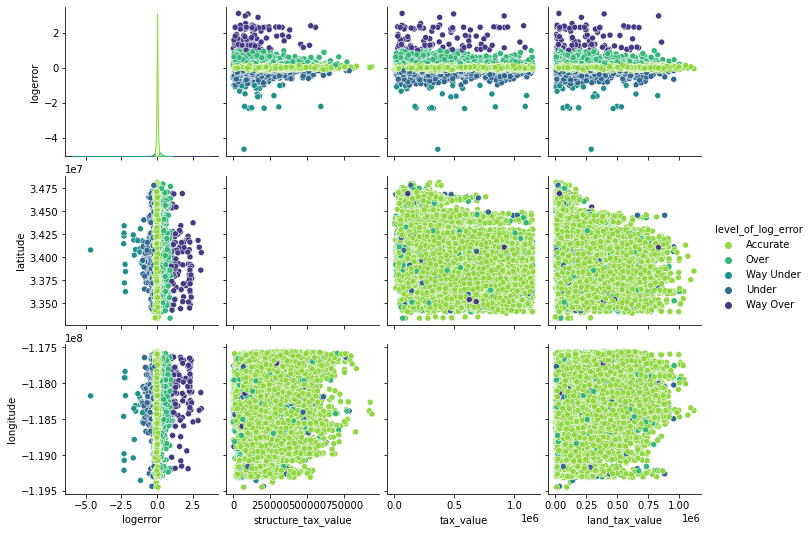

In [13]:
sns.pairplot(data = train, hue = 'level_of_log_error', 
             x_vars = ['logerror', 'structure_tax_value', 'tax_value', 
                       'land_tax_value'],
             y_vars = ['logerror', 'latitude', 'longitude'], 
             palette='viridis_r')

### Takeaways:
- 

___

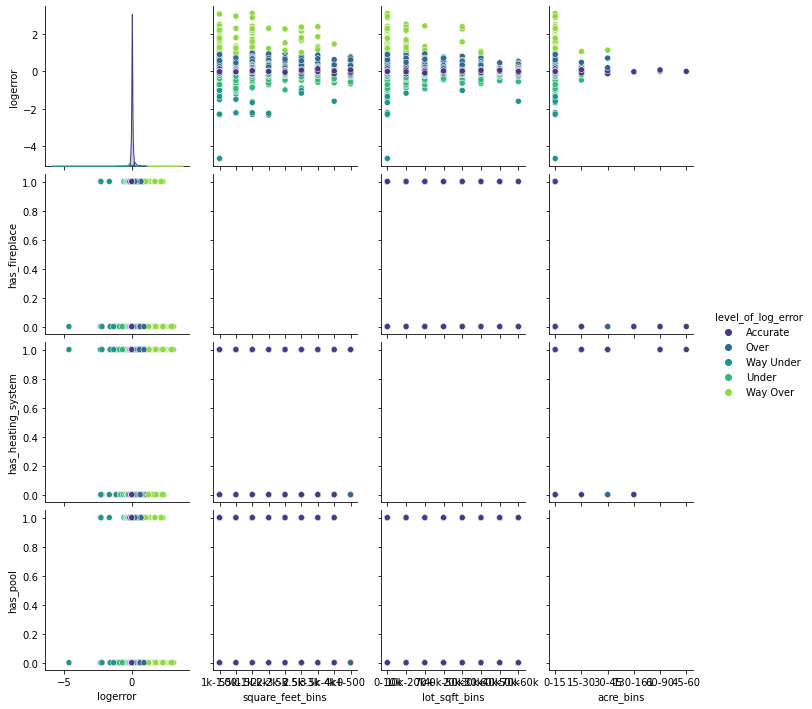

In [14]:
sns.pairplot(data = train, hue = 'level_of_log_error', 
             x_vars = ['logerror', 'square_feet_bins', 'lot_sqft_bins', 
                       'acre_bins'],
             y_vars = ['logerror', 'has_fireplace', 'has_heating_system', 
                       'has_pool'], palette='viridis')

### Takeaways:
- 

___

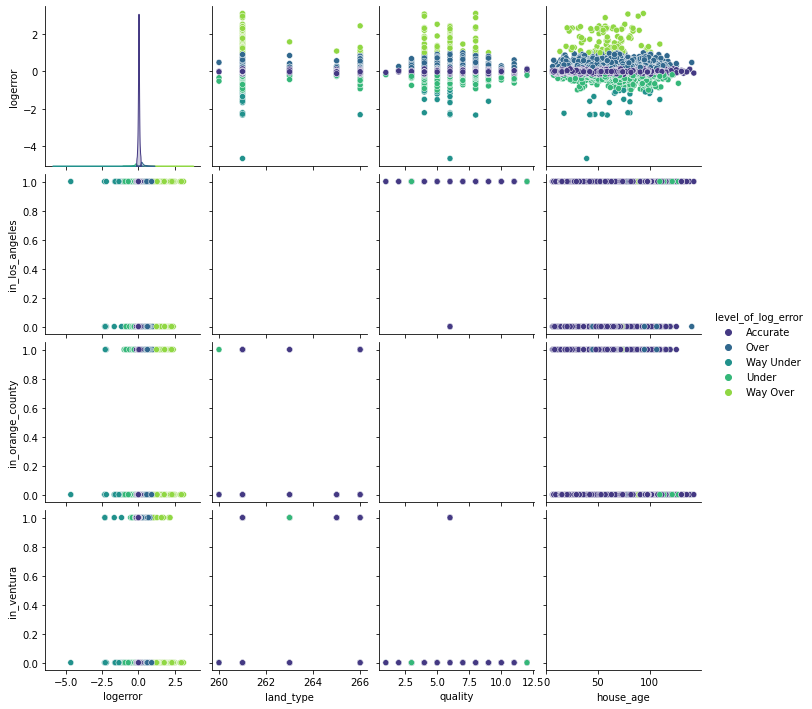

In [15]:
sns.pairplot(data = train, hue = 'level_of_log_error', 
             x_vars = ['logerror', 'land_type', 'quality', 
                       'house_age'],
             y_vars = ['logerror', 'in_los_angeles', 
                       'in_orange_county', 'in_ventura'], palette='viridis')

### Takeaways:
- 

___

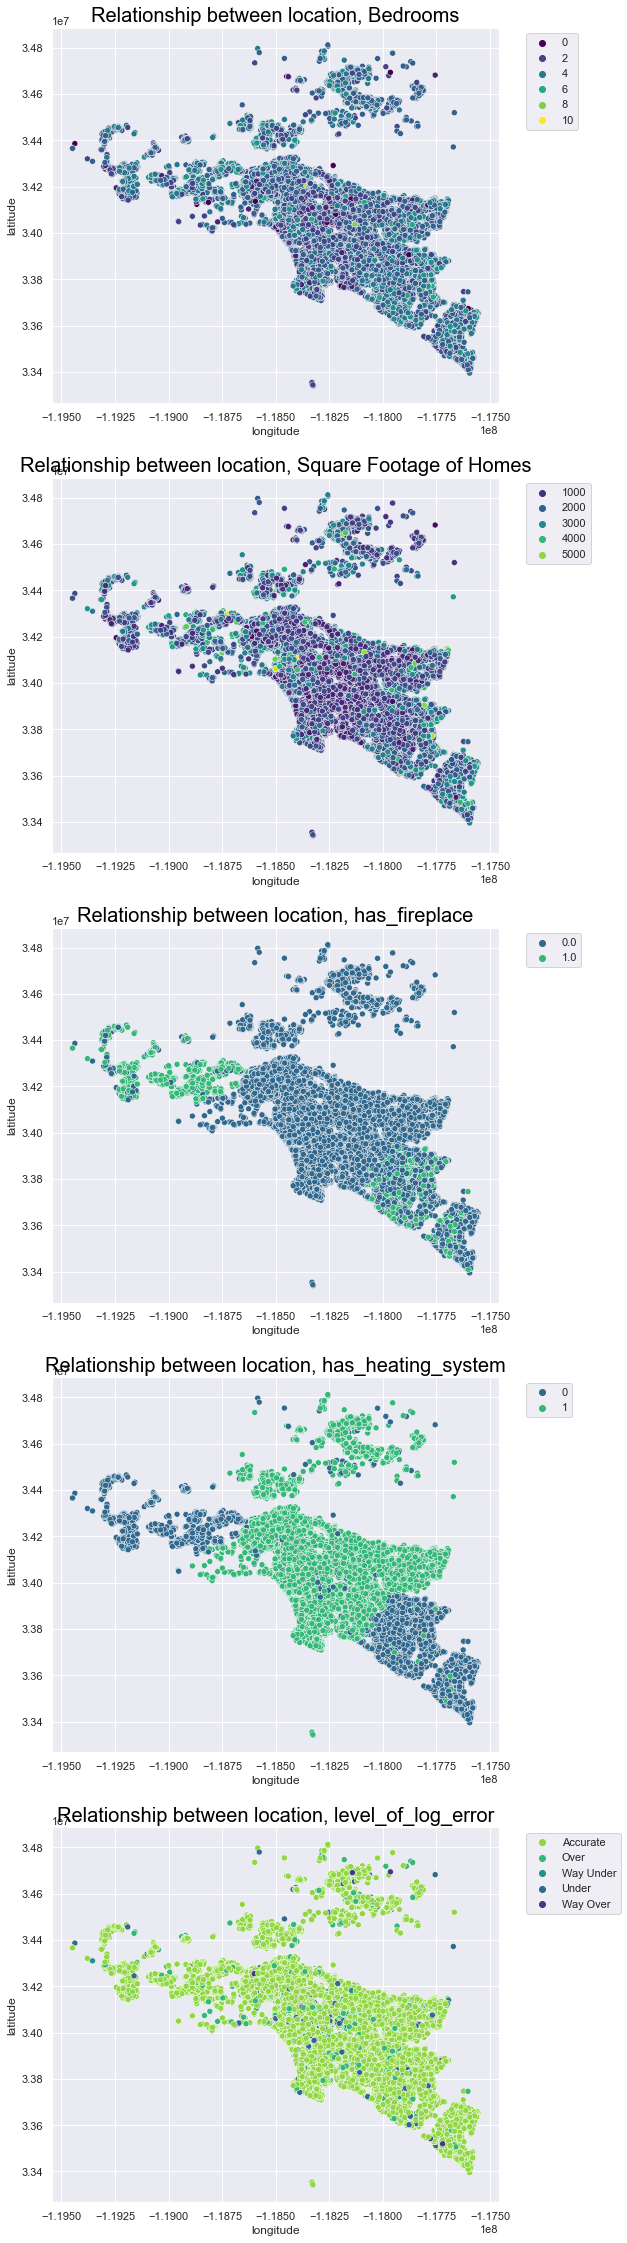

In [16]:
plt.subplots(5, 1, figsize=(8,40), sharey=True)
sns.set(style="darkgrid")

plt.subplot(5,1,1)
plt.title("Relationship between location, Bedrooms", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue=train.bedrooms, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,2)
plt.title("Relationship between location, Square Footage of Homes", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue='square_feet', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
plt.subplot(5,1,3)
plt.title("Relationship between location, has_fireplace", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue=train.has_fireplace, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,4)
plt.title("Relationship between location, has_heating_system", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue=train.has_heating_system, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,5)
plt.title("Relationship between location, level_of_log_error", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue='level_of_log_error', palette='viridis_r')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Takeaways:
- 

___

TypeError: Neither the `x` nor `y` variable appears to be numeric.

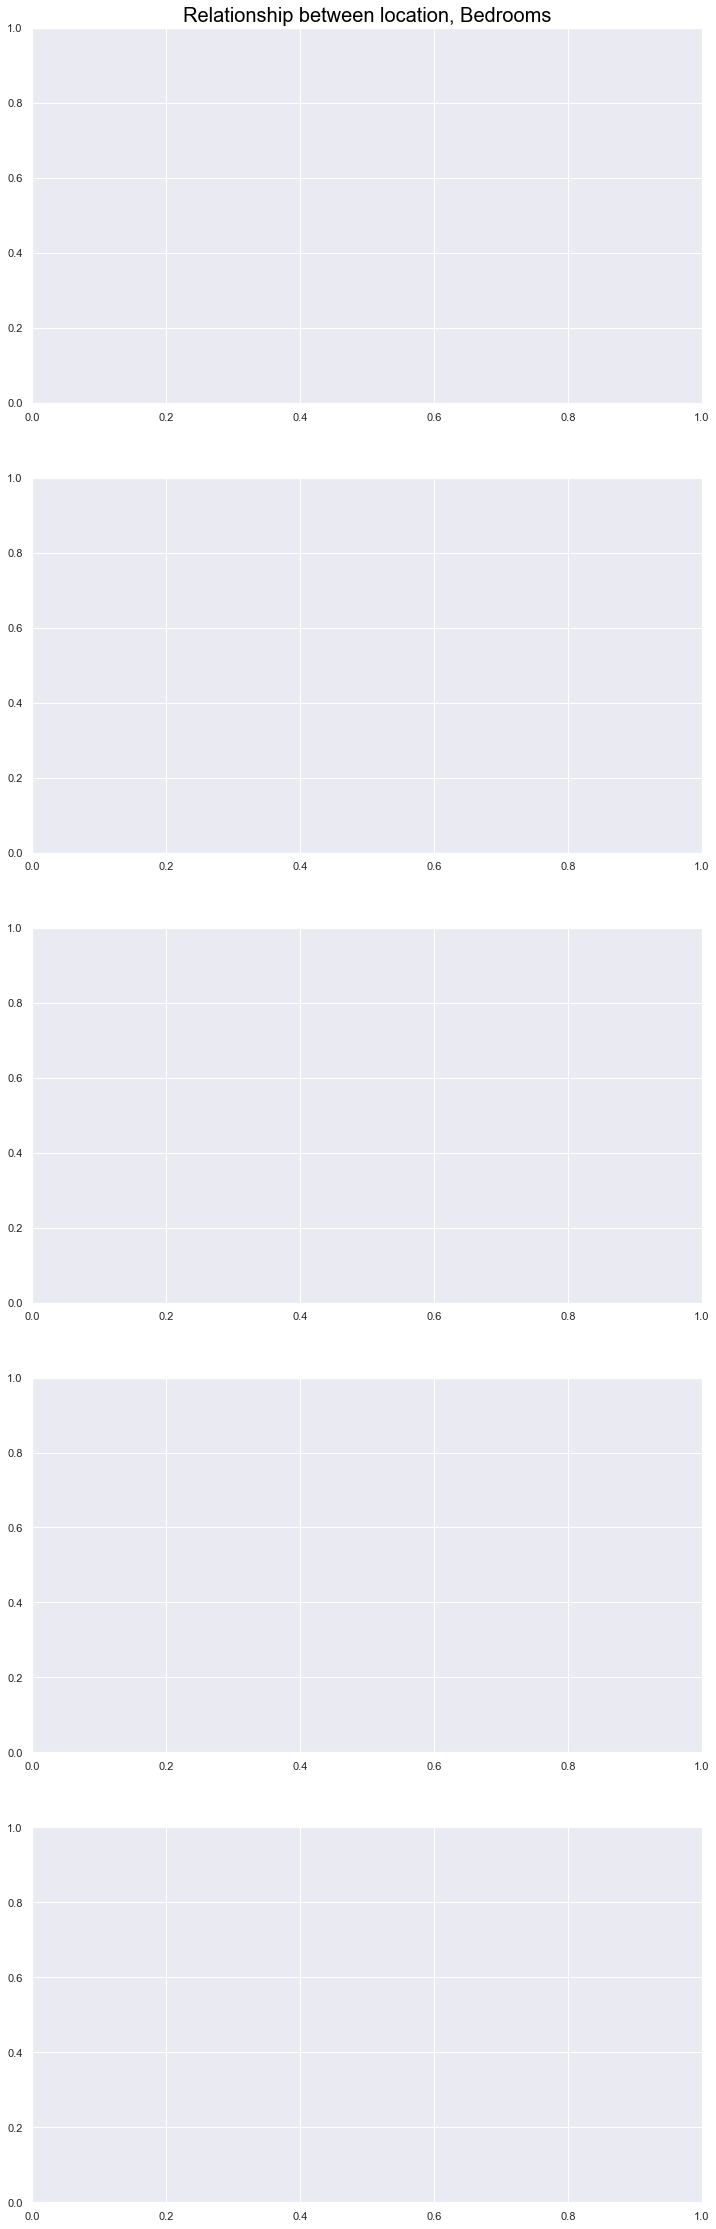

In [17]:
plt.subplots(5, 1, figsize=(12,40), sharey=True)
sns.set(style="darkgrid")

plt.subplot(5,1,1)
plt.title("Relationship between location, Bedrooms", size=20, color='black')
sns.violinplot(y='acres', x='level_of_log_error', data=train,
               inner="quart", linewidth=1, 
               palette='viridis', split=True)

plt.subplot(5,1,2)
plt.title("Relationship between location, Square Footage of Homes", size=20, color='black')
sns.violinplot(y='square_feet_bins', x='level_of_log_error', data=train,
               inner="quart", linewidth=1, 
               palette='viridis')
    
plt.subplot(5,1,3)
plt.title("Relationship between location, has_fireplace", size=20, color='black')
sns.violinplot(x='level_of_log_error', y='lot_sqft_bins', data=train,
               inner="quart", linewidth=1, 
               palette='viridis', split=True)

plt.subplot(5,1,4)
plt.title("Relationship between location, has_heating_system", size=20, color='black')
sns.violinplot(x='level_of_log_error', y='longitude', hue='in_los_angeles', data=train,
               inner="quart", linewidth=1, 
               palette='viridis', split=True)

plt.subplot(5,1,5)
plt.title("Relationship between location, level_of_log_error", size=20, color='black')
sns.violinplot(x='level_of_log_error', y='latitude', hue='in_los_angeles', data=train,
               inner="quart", linewidth=1, 
               palette='viridis', split=True)

### Takeaways:
- 

____

In [ ]:
sns.boxenplot(x=train["logerror"])

In [ ]:
df.level_of_log_error.value_counts()

### Takeaways:
- A reading of "Way Under"
    - log error between -1 and -5
- A reading of "Under"
    - log error between -0.15 and -1
- An accurate reading 
    - log error between -.15 and 0.15
- A reading of "Over" 
    - log error between 0.15 and 1
- A reading of "Way Over"
    - log error between 1 and 5
        
- There are far more accurate readings then unaccurate readings.
    - Accurate readings
        - 46,416 total
    - All other readings
        - 4,791 total
    
        
This leads me the believe that there may not be just one driver of logerror. Many features may be driving the log error we do have. I Would want to look further into this using a regression model maybe.


___

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = train.land_tax_value, y = train.logerror, hue = train.level_of_log_error, palette='viridis')

### Takeaways:
- 

In [ ]:
binary_vars = ['bedrooms', 'bathrooms', 'land_type', 'has_heating_system',
               'fips', 'has_fireplace', 'full_bathrooms','has_pool', 'city','county',
               'zip_code','unitcnt','in_los_angeles', 'in_orange_county', 'in_ventura',
                'lot_sqft_bins','acre_bins','square_feet_bins' ]

quant_vars = ['square_feet', 'lot_square_feet', 'quality', 'latitude', 'bathrooms', 'bedrooms',
                'longitude','room_count', 'structure_tax_value','tax_value', 'land_tax_value', 
              'taxamount', 'house_age', 'tax_rate']

categorical_target = 'level_of_log_error'
continuous_target = 'logerror'

# Clustering

## Tax Rate Clustering

In [ ]:
A = train[['logerror', 'tax_rate']]
scaler = StandardScaler().fit(A)
A_scaled = pd.DataFrame(scaler.transform(A), columns= A.columns).set_index([A.index.values])
A.head()

In [ ]:
from sklearn.cluster import KMeans
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(A).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 10)):
    clusters = KMeans(k).fit(A_scaled).predict(A_scaled)
    ax.scatter(A.tax_rate, A.logerror, c=clusters, cmap='viridis_r')
    ax.spines["bottom"].set_color("royalblue")
    ax.spines["left"].set_color("cornflowerblue")
    ax.spines["top"].set_color("gold")
    ax.spines["right"].set_color("mediumseagreen")
    ax.set(title='k = {}'.format(k), xlabel='tax_rate', ylabel='logerror')

# Statistical Tests